In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier


In [6]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [12]:
df['bmi'].fillna(method='bfill', inplace=True)

<ipython-input-12-6966b0453083>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(method='bfill', inplace=True)
<ipython-input-12-6966b0453083>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bmi'].fillna(method='bfill', inplace=True)


In [13]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [14]:
df.isnull().sum().sum()

0

In [15]:
df['gender_encoded'] = np.where(df['gender'] == 'Female', 1,0)
df.drop(columns=['gender'], inplace=True)
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1,1
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [16]:
df['married_encoded'] = np.where(df['ever_married'] == 'Yes', 1,0)
df.drop(columns=['ever_married'], inplace=True)
df.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,married_encoded
0,9046,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,51676,61.0,0,0,Self-employed,Rural,202.21,32.5,never smoked,1,1,1
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,1


In [17]:
df['smoking'] = np.where(df['smoking_status'] == 'formerly smoked', 1,0)
df.drop(columns=['smoking_status'], inplace=True)
df.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded,married_encoded,smoking
0,9046,67.0,0,1,Private,Urban,228.69,36.6,1,0,1,1
1,51676,61.0,0,0,Self-employed,Rural,202.21,32.5,1,1,1,0
2,31112,80.0,0,1,Private,Rural,105.92,32.5,1,0,1,0
3,60182,49.0,0,0,Private,Urban,171.23,34.4,1,1,1,0
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,1,1,1,0


In [18]:
df.drop(['id','work_type','Residence_type'],axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,married_encoded,smoking
0,67.0,0,1,228.69,36.6,1,0,1,1
1,61.0,0,0,202.21,32.5,1,1,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,1,0
4,79.0,1,0,174.12,24.0,1,1,1,0


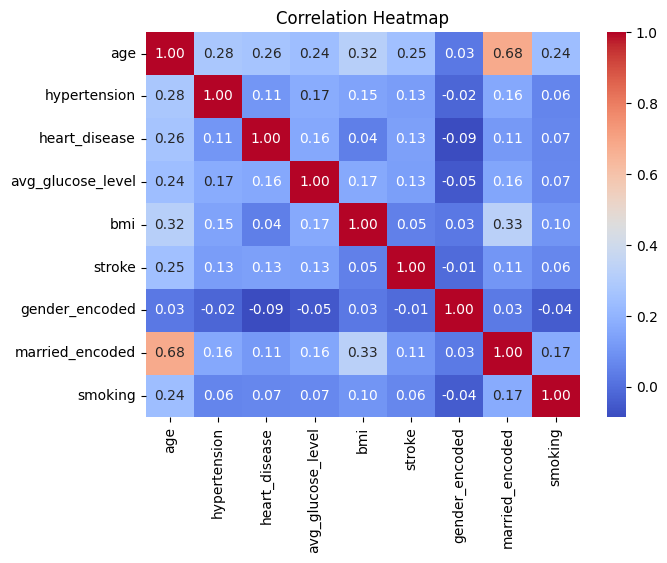

In [19]:
correlation_matrix = df.corr()


plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
X=df.drop(columns=['stroke'], axis=1)
Y=df['stroke']

In [21]:
X


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,married_encoded,smoking
0,67.0,0,1,228.69,36.6,0,1,1
1,61.0,0,0,202.21,32.5,1,1,0
2,80.0,0,1,105.92,32.5,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0
4,79.0,1,0,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,40.0,1,1,0
5106,81.0,0,0,125.20,40.0,1,1,0
5107,35.0,0,0,82.99,30.6,1,1,0
5108,51.0,0,0,166.29,25.6,0,1,1


In [22]:
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
X_train_prediction = model.predict(X_train)  #4000
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [27]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9542563600782779


In [28]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9393346379647749


In [30]:
X.tail()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,married_encoded,smoking
5105,80.0,1,0,83.75,40.0,1,1,0
5106,81.0,0,0,125.20,40.0,1,1,0
5107,35.0,0,0,82.99,30.6,1,1,0
5108,51.0,0,0,166.29,25.6,0,1,1
5109,44.0,0,0,85.28,26.2,1,1,0


In [31]:
input_data = {
    'age': 80.0,
    'hypertension': 1,
    'heart_disease': 0,
    'avg_glucose_level': 83.75,
    'bmi': 40.0,
    'gender_encoded': 1,
    'married_encoded': 1,
    'smoking': 0
}

input_data_as_dataframe = pd.DataFrame([input_data])

prediction = model.predict(input_data_as_dataframe)


if prediction[0] == 0:
    print('The Person is not a brain Stroke Patient')
else:
    print('The Person is a brain Stroke patient')


The Person is not a brain Stroke Patient


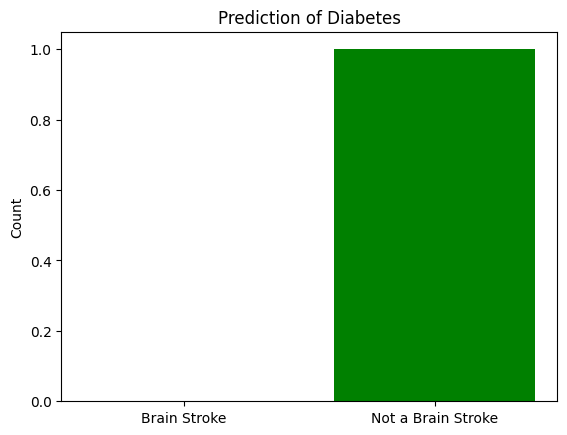

In [32]:
labels = ['Brain Stroke', 'Not a Brain Stroke']
sizes = [1 if prediction[0] == 1 else 0, 1 if prediction[0] == 0 else 0]
colors = ['red', 'green']

plt.bar(labels, sizes, color=colors)
plt.title("Prediction of Diabetes")
plt.ylabel("Count")
plt.show()

In [33]:
model1=RandomForestClassifier()

In [34]:
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
X1_train_prediction=model1.predict(X_train)
training_data_accuracy1=accuracy_score(X1_train_prediction, Y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy1)

Accuracy on Training data :  1.0


In [46]:
X1_test_prediction = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(X1_test_prediction, Y_test)

In [48]:
print('Accuracy on Test data : ', test_data_accuracy1)

Accuracy on Test data :  0.9383561643835616
